# Интернет

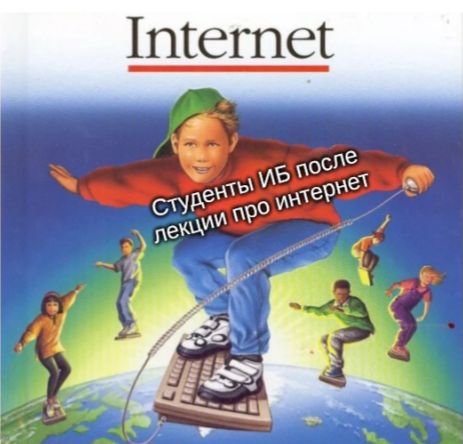

## Как это работает?

В этой лекции мы не будем разбирать всякие низкоуровневые штуки по типу протоколов TCP/IP и того, как, куда и зачем бегут электроны по проводочкам. Вместо этого мы посмотрим только на самую верхушку айсберга, знания которой могут оказаться наиболее востребованными на практике

### Терминология

По сути интернет это просто набор компьютеров (в широком смысле), которые общаются между собой, пользуясь определёнными правилами &mdash; **протоколами**. В сети используются различные протоколы, которые подходят для различных задач. Так, вы, например, знакомы с протоколом **SSH** (**S**ecure **Sh**ell), который используется для управления удалёнными устройствами.

Наиболее широко распространённым сейчас является протокол **HTTPS** (**H**yper**T**ext **T**ransfer **P**rotocol **S**ecure), который используется в современных браузерах для получения информации с веб-сайтов (загрузки страничек, музыки, видосиков и других данных), про него мы и будем говорить дальше. Он является расширением стремительно устаревающего протокола HTTP, нацеленным на повышение безопасности передачи данных.

В HTTPS общение между узлами сети происходит при помощи **запросов (request)**. Запрос это некоторое сообщение специального вида на которое ожидается какой-то **ответ (response)**.

Программы, которые отправляют запросы, называют **клиентами (client)**, а программы, получающие запросы, **серверами (server)**. Вы скорее всего где-то слышали про эти понятия, но важным тут является то, что **клиент и сервер** это не физические устройства (например, ПК или смартфон), а **программное обеспечение**. Так например, клиент и сервер могут спокойно существовать в пределах одного устройства и беспрепятственно общаться друг с другом. В случае, когда вы что-то делаете в браузере, **браузер это клиент**.

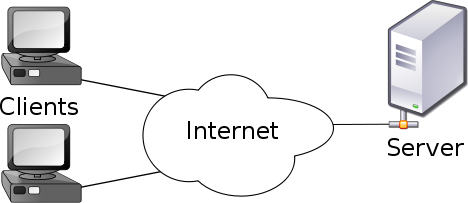

Мы намерено опустим тонкости передачи запросов и их путешествия по сети, но некоторых моментов всё же стоит коснуться

### Как клиент понимает, куда отправлять запрос?

Для этого у каждого сервера существует свой адрес. На более низком уровне он представлен **IP адресом** формата `0-255:0-255:0-255:0-255`, а на более высоком в виде **URL** (**U**niform **R**esource **L**ocator) с которым вы все хорошо знакомы, это тот самый адрес в *адресной* строке браузера и ссылки, которые вы куда то или кому то кидаете.

Про формат URL неплохо написано в википедии, но далее мы это разберём более подробно https://ru.wikipedia.org/wiki/URL#Структура_URL

Зная URL сервера, мы, как клиент, можем отправить ему запрос и получить ответ. Давайте разберём из чего состоит и то, и другое

### Структура HTTP запроса

HTTP запрос представляет из себя самый обычный текст, но в этом тексте обязаны находится характерные для всех HTTP запросов элементы:
1. Стартовая строка. Она содержит:
    + Метод запроса (GET, POST, PUT etc.)
    + Адрес (URL)
    + Версию протокола
2. Заголовки
3. Тело запроса (опционально)

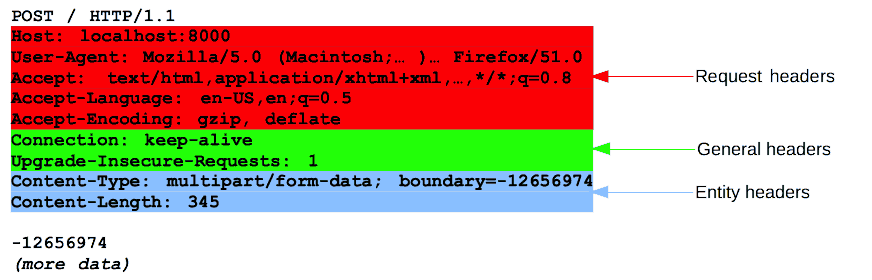

#### Методы запроса

**Метод** запроса &mdash; это указание серверу на тип действия, которое он должен выполнить. Сервер может интерпретировать методы, как пожелает, но существуют некоторые конвенции по их использованию. Рассмотрим самые основные

##### GET

Метод HTTP запроса `GET` зачастую служит для **получения** каких-то **данных с сервера**, самый банальный пример &mdash; запрос на загрузку веб-странички

##### POST

Метод HTTP запроса `POST` служит для **отправки** каких-то **пользовательских данных на сервер**. Например, загрузка картинки на сайт, с очень большой вероятностью при выполнении этого действия происходит именно `POST` запрос.

**На этом хватит, остальные методы используются реже и скорее всего вам не понадобятся, но ещё есть `PUT`, `HEAD`, `OPTIONS`, `DELETE`, `PATCH` ...**

#### Заголовки запроса

**Заголовки (headers)** &mdash; это часть запроса, несущая различную вспомогательную информацию в формате `key: value` и занимает строки, начиная со второй.

Существует большое количество конвенциональных заголовков, которые могут распознавать большинство серверов, но также никто не запрещает вам создавать свои собственные заголовки. Правда в таком случае нет никаких гарантий, что сервер сможет это как-то обработать.

Заголовков внутри запроса может быть любое количество

Зачастую нам не нужно вручную редактировать заголовки или разбираться в том, что в них содержится. По большей части это служебная информация, необходимая клиенту и серверу, но не пользователю. Тем не менее можно выделить несколько из них для примера:
1. **User-Agent** указывает информацию о клиенте. Чаще всего, это тип и версия веб-браузера (если вы делаете запрос из браузера, так как браузер это и есть клиент). Этот заголовок можно подменивать, чтобы обмануть сервер, заставив его думать, что к нему подключаются разные клиенты.
2. **Host** показывает адрес клиента, который выполняет запрос
3. **Content-Type** показывает тип данных в теле запроса
4. **Content-Length** показывает длину тела запроса (в байтах)

#### Тело запроса

**Тело запроса** содержит в себе данные, которые клиент хочет передать серверу. Это может быть что угодно, при этом для разных типов данных в заголовок **Content-Type** указывается соответствующий тип. Бывают следующие основные типы данных в теле запроса:
1. `text/html` - HTML страница
2. `text/plain` - самый обычный текст
3. `multipart/form-data` - данные из отправленных форм
4. `image/png` - картинка в формате PNG
5. `application/json` - данные в формате JSON
6. [и ещё очень много других...](https://www.geeksforgeeks.org/http-headers-content-type/)

Все перечисленные составные части запросов можно буквально печатать своими руками в текстовом редакторе, а затем отправлять на сервер. Но, понятное дело, что так никто не делает, большую часть работы на себя берёт клиент

### Структура HTTP ответа

Когда сервер получит запрос от клиента и обработает его, он отправит обратно **ответ**.

HTTP ответ очень похож на запрос, он также представлен самым обычным текстом и содержит очень похожие элементы:
1. Строка статуса. Она содержит:
    + Версию протокола
    + Статус-код
    + Поясняющую фразу    
2. Заголовки
3. Тело запроса (опционально)

Как мы видим, это мало чем отличается от запроса.

Ну ок, с заголовками и телом всё понятно, тут всё также как и с запросами, есть конвенциональные заголовки, могут быть специальные, в теле ответа может быть что угодно. Сосредоточим внимание на первой строке

#### Статус-коды

Помимо версии протокола, первая строка также содержит так называемый **статус-код**. Это трёхзначное число, которое показывает, как сервер отреагировал на запрос. Также строка содержит короткую поясняющую фразу, которая пытается объяснить этот статус-код

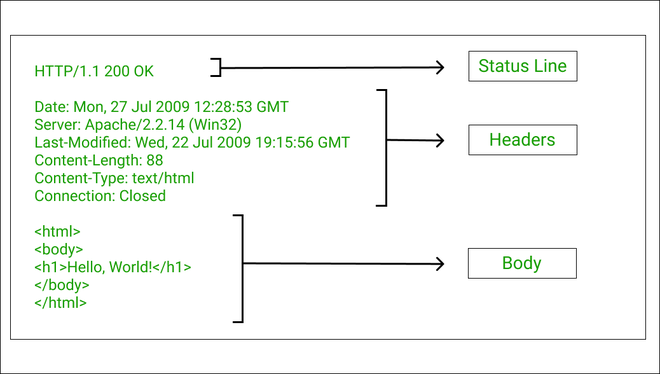

Статус-кодов существует очень много и очень полезно уметь их читать, а также наизусть помнить самые важные из них. Это может слегка облегчить жизнь даже вне контекста программирования

Статус-коды делятся на пять типов по их первой цифре, а также на подтипы по оставшимся цифрам:
1. **1xx - информационные (informational)**. Название говорит само за себя. Такие коды присутствуют у ответов, когда сервер просто хочет нам что-то сообщить (например, что он успешно получил запрос). Данные коды встречаются довольно редко
2. **2xx - успешные (success)**. Данные коды обозначают, что запрос прошёл успешно и мы получили от сервера то, что мы хотели
    + **<ins>200 OK</ins>** &mdash; это самый успешный успех, который только можно представить. Это значит, что клиент успешно сделал запрос и получил желаемый результат
    + **201 Created** &mdash; запрос оказался успешным и привёл к созданию нового ресурса
    + **204 No Content** &mdash; запрос прошёл успешно, но серверу нечего нам вернуть
3. **3xx - перенаправление (redirect)**. Такой код обозначает, что желаемый ресурс по указанному адресу не найден, но найден в другом месте. В заголовках таких ответов обычно содержится адрес по которому нужно сделать новый запрос. То есть данный код встречается, когда сервер перенаправляет нас по другому адресу
    + **301 Moved Permanently** - ресурс перемещён на другой адрес навсегда
    + **302 Found** - ресурс перемещён на другой адрес временно
4. **4xx - клиентские ошибки (client error)**. Данный код показывает, что в запросе клиента присутствует ошибка или не хватает информации
    + **<ins>400 Bad Request</ins>** - некорректный запрос, например, с нарушенной структурой (без метода или критически важного заголовка)
    + **<ins>403 Forbidden</ins>** - нет доступа (пример ниже - попытка перейти по ссылке на закрытый курс на степике)
    + **<ins>404 Not Found</ins>** - запрашиваемый ресурс не найден
5. **5xx - серверные ошибки (server error)**. Данный код показывает, что сервер не смог обработать запрос.

Полный список [здесь](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP)

Знать все коды наизусть конечно же не надо, но надо обязательно знать типы кодов и что они значат (первая цифра), а также крайне рекомендую запомнить подчёркнутые коды, они встречаются довольно часто.

Из этого списка вытекает одно очень полезное жизненное правило: **если код 4xx, то это ваш косяк** и стоит попытаться его исправить, **если код 5xx, то это косяк сервера**, вы не сможете ему помочь, здесь можно только надеятся и верить, что его починят, не тратьте время на выяснение причины проблемы в таких случаях

Пример кода **403**. Вы не поступили на закрытый курс, значит доступ к нему для вас запрещён (**Forbidden**)

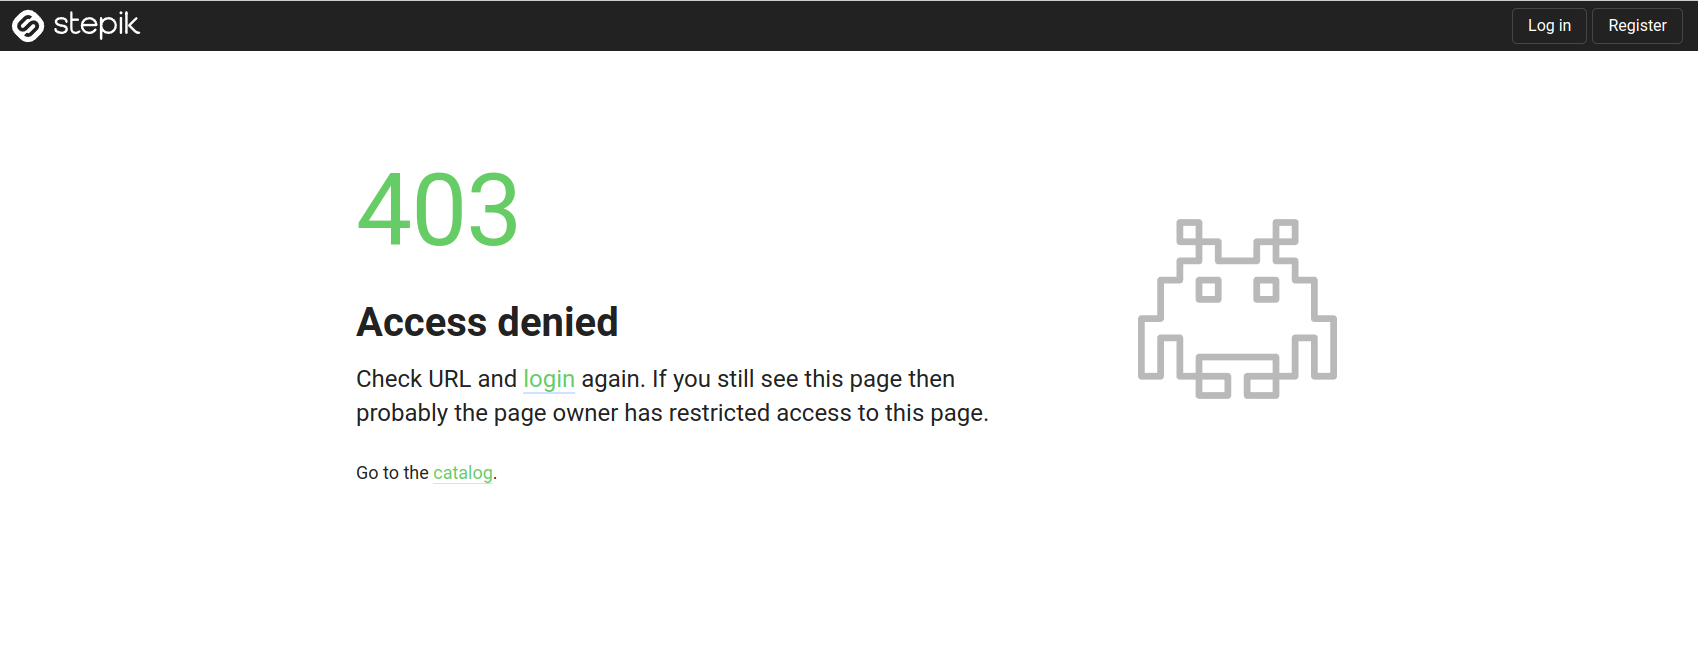

### Подробнее про GET запросы и структуру URL

URL в общем виде выглядит вот так (здесь нет некоторых элементов, но это не критично)

`https://stepik.org/lesson/779029/step/1?unit=781553`

Разберём его на составляющие

#### Схема
1. `https` - это **протокол**, который используется для запроса (строго говоря, это назывется *схема*, но зачастую она обозначает именно протокол)

#### Хост
2. `stepik.org` - **хост (host)**, это человекочитаемое имя сайта. Специальные ДНС сервера позволяют нам по имени хоста получить IP адрес сервера (но это уже детали). Вместо хоста также вполне легально использовать IP адрес.
    + `org` - домен верхнего уровня, так же как `com`, `ru` и др. Вам не нужно знать в деталях что это, просто запомните название.
    + Также существуют ещё и домены нижних уровней, они пишутся в начале имени хоста через точку (в данном примере их нет, но можно взять `https://ru.wikipedia.org/wiki/URL`. Здесь домен верхнего уровня это `org`, а нижнего `ru`). Доменов нижних уровней может быть сколько угодно.
    
#### Путь
3. `/lesson/779029/step/1` - **путь (path)**. Хоть это и называется "путь", эта строка не является непосредственным путём в файловой системе на сервере. Сервер может проанализировать данную строку и на основании этого выдать определённый ответ. Пути не всегда отражают иерархию страниц на сайте, как это может иногда показаться. При этом легко убедиться, что сервер решает, какой именно ответ нам выдать, в том числе в зависимости от пути. Для этого перейдите по оригинальной ссылке, а затем замените в адресной строке `lesson/779029/step/1` на `lesson/779029/step/2` и вы "магическим" образом окажетесь на странице следующего шага. Как вы видите, всё довольно логично, и по URL вполне можно догадаться за что отвечают отдельные элементы пути и изменять их в зависимости от своих нужд. Однако это работает не всегда. Например, можно догадаться, что `779029` это некий ID урока на степике, но так как это число сильно больше, чем количество уроков в любом курсе, мы можем понять, что это некоторое абсолютное значение и не факт, что путь `/lesson/779030/step/1` приведёт нас на другой урок этого же курса.

#### Query string

<a href="#querystring"></a>


4. `?unit=781553` - это самое интересное. Данная штука называется **query string (строка параметров)**.

В ней записаны дополнительные параметры запроса, которые будут переданы серверу в формате `?key_1=value_1&key_2=value_2&key_3=value_3`. В случае этого URL не совсем понятно, что это, поэтому рассмотрим на другом примере

`https://translate.google.ru/?hl=ru&tab=rT&sl=ru&tl=en&op=translate`

Здесь этих параметров довольно много. По уже имеющимся значениям мы можем выяснить за что каждый из них отвечает и на основании этого, попробовать другие варианты.

Например, очевидно, что ключи `hl`, `sl`, `en` соответствуют каким-то языкам. Попробуйте сами поменять значения для этих ключей на аббревиатуры каких либо ещё языков.

На этом моменте вы уже должны были почувствовать себя хакером

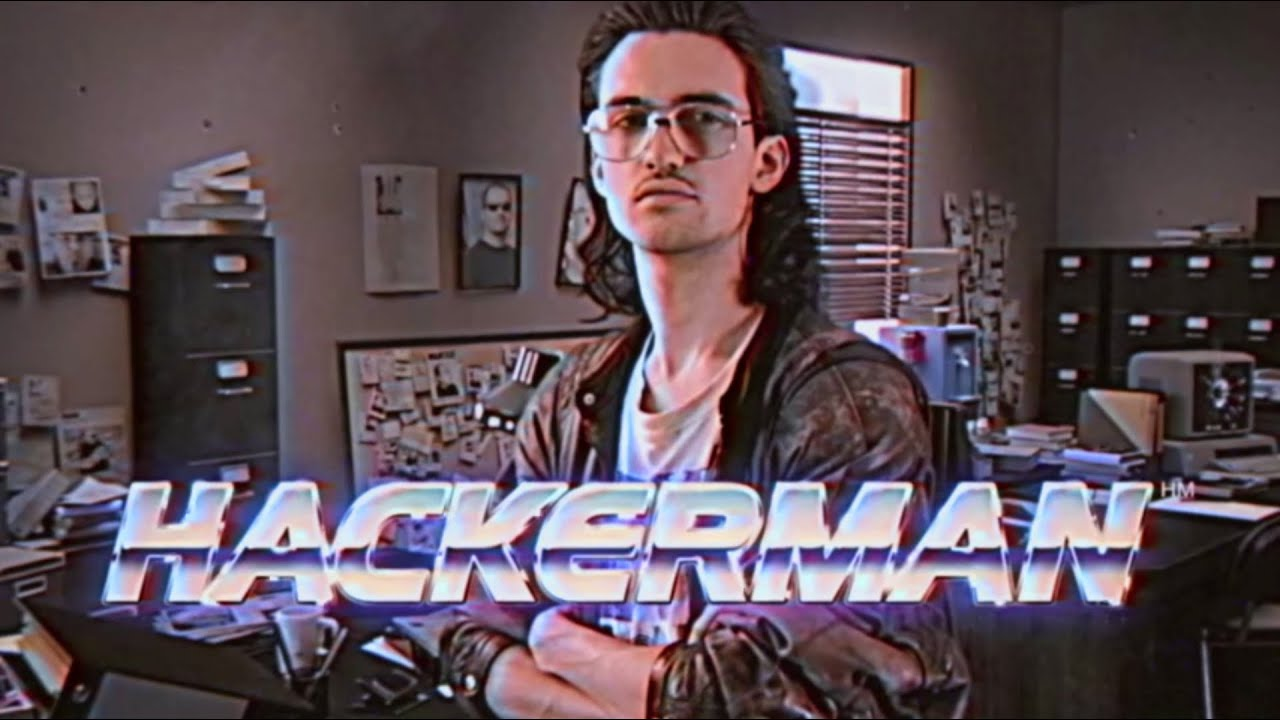

Таким образом, query string позволяет передавать серверу вместе с запросом произвольные параметры в формате ключ-значение, это довольно удобный инструмент.

Важно также заметить, что query string используется в основном только с GET запросами, поэтому если вы находитесь на какой-то странице и видите query string, то с большой вероятностью вы оказались здесь при помощи GET запроса.

Теперь вы умеете изменять поведение запросов, вручную анализируя и редактируя URL

### Веб страницы

Самое частое с чем мы сталкиваемся в интернете и, что содержит большую часть информации, это веб страницы.

Веб-страницы это ни что иное, как самый обычный текстовый документ, который нам отправляет сервер в ответ на наш запрос. Браузер же умеет работать с такими документами и отображает нам красивую страничку. Большинство веб страниц существует в специальном текстовом формате [HTML](https://en.wikipedia.org/wiki/HTML)

#### HTML

Формат HTML (**H**yper**T**ext **M**arkup **L**anguage) это текстовый формат (то есть его можно открыть в обычном текстовом редакторе) с особой структурой. Весь HTML документ состоит из набора вложенных друг в друга **элементов**.

**Элементы** в свою очередь образуются при помощи **тэгов**

**Тэг** - это специальный модификатор, который обозначается знаками `<>`. Тэги бывают **октрывающие** (`<tag_name>`) и **закрывающие** (`</tag_name>`). **Элемент** образуется открывающим и закрывающим тэгами, а также контентом между ними

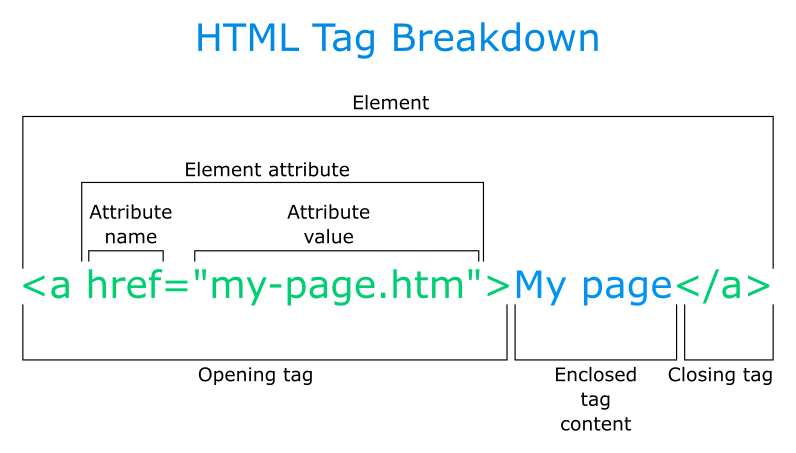

Различные элементы, как правило, влияют на форматирование страницы. Браузер прекрасно понимает HTML и отображает элементы согласно их тегам. Например, тег `<b></b>` способен сделать текст, находящийся между открывающим и закрывающим тэгами **жирным**.

Тэгов существует [очень много](https://www.w3schools.com/TAGS/default.asp). Например, бывают элементы, не требующие закрывающего тега. Бывают элементы внутри которых можно писать текст, а бывают в которых нельзя.

Ещё на картинке выше мы видим, что у элементов бывают **атрибуты**. Это специальные модификаторы в формате `key=value`, которые указываются внутри открывающего тега, они могут влиять на поведение и отображение элемента

Кстати, HTML также поддерживается Markdown ячейками в jupyter notebook, поэтому вы можете посмотреть, что за тэги стоят за примерами ниже, раскрыв содержимое этой ячейки для редактирования

<b>This text is bold</b>

<i>This text is bold</i>

<a href="https://en.wikipedia.org/wiki/HTML">This is link</a>

<div style="text-align: center">This text is centered</div>

<div style="color: red">This text is red</div>


<div style="border: 2px solid red; padding: 10px;">
  <div style="border: 2px solid blue; padding: 10px;">
    <p>This is a nested element with a blue border.</p>
  </div>
  <div style="border: 2px solid green; padding: 10px;">
    <p>This is another nested element with a green border.</p>
  </div>
</div>

В примере выше вы также можете видеть, что элементы можно вкладывать друг в друга (вставить элемент между открывающим и закрывающим тегом другого элемента), тем самым создавая вложенную структуру.

На данном этапе **нам не нужно уметь писать HTML-код**, но **нужно уметь его читать и примерно понимать**, что из себя представляют основные элементы, а также знать несколько важных тегов.

Вот, например, маленький кусочек кода страницы репозитория на GitHub. Это примерно 1.6% от всего содержимого страницы. В браузере Chrome HTML код любой страницы можно просмотреть при помощи `ПКМ -> View page source` или `Ctrl+U`
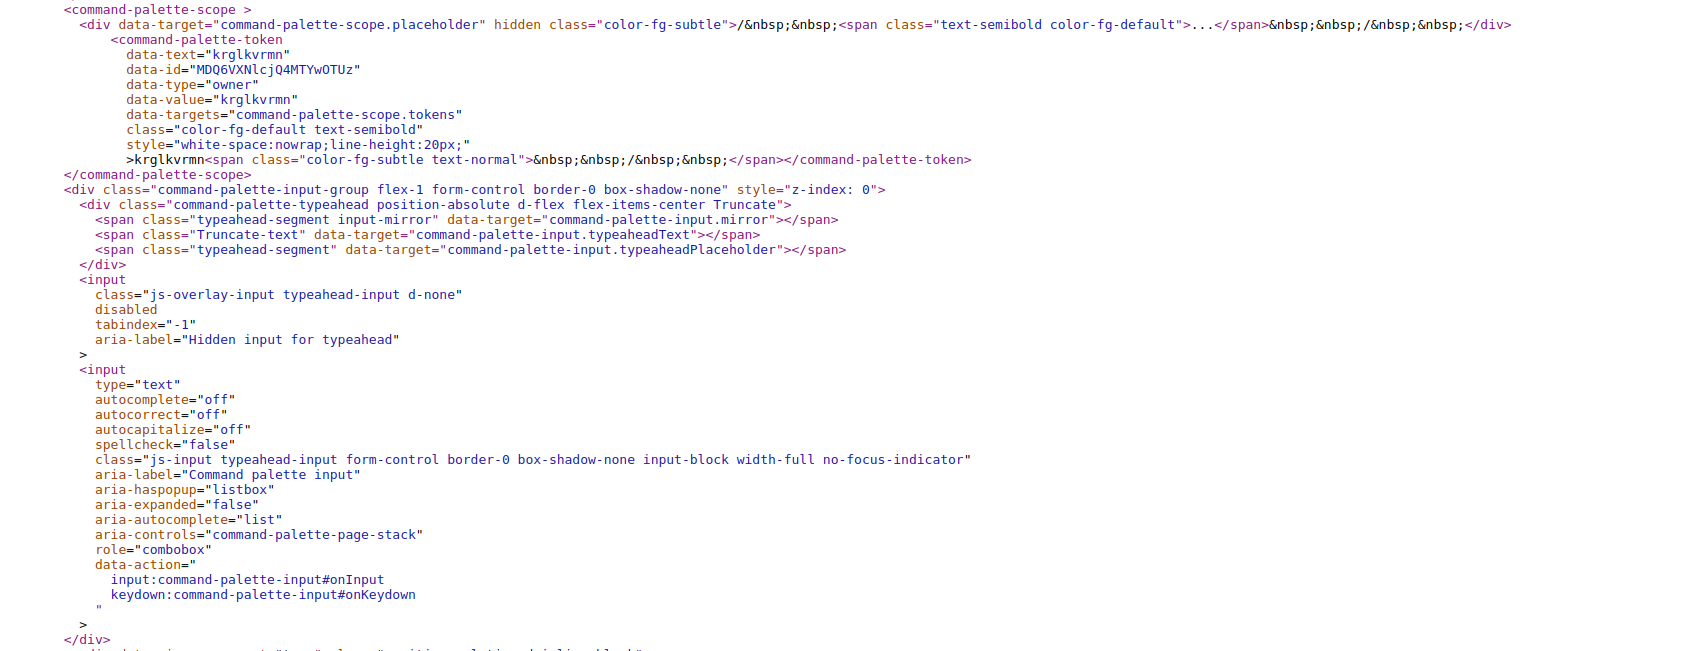

#### Chrome developer tools

В разы более удобный способ изучения HTML кода страницы предоставляется "инструментами для разработчика" в Chrome (в других браузерах есть свои аналоги). Данное меню можно открыть при помощи `ПКМ -> Inspect` или `Ctrl+Shift+C`. Это мощнейший инструмент, который мы будем активно использовать.

По-умолчанию при открытии этого меню мы попадаем на вкладку *Elements*, которая в удобном виде отображает **элементы** HTML страницы во вложенном виде. Элементы можно раскрывать и сворачивать по щелчку мыши. Что ещё более удобно, при наведении на элемент в панели справа, на самой странице подсвечивается участок, который соответствует данному элементу. Благодаря этой фиче можно быстро находить элементы, которые соответствуют интересующему нас контенту на странице

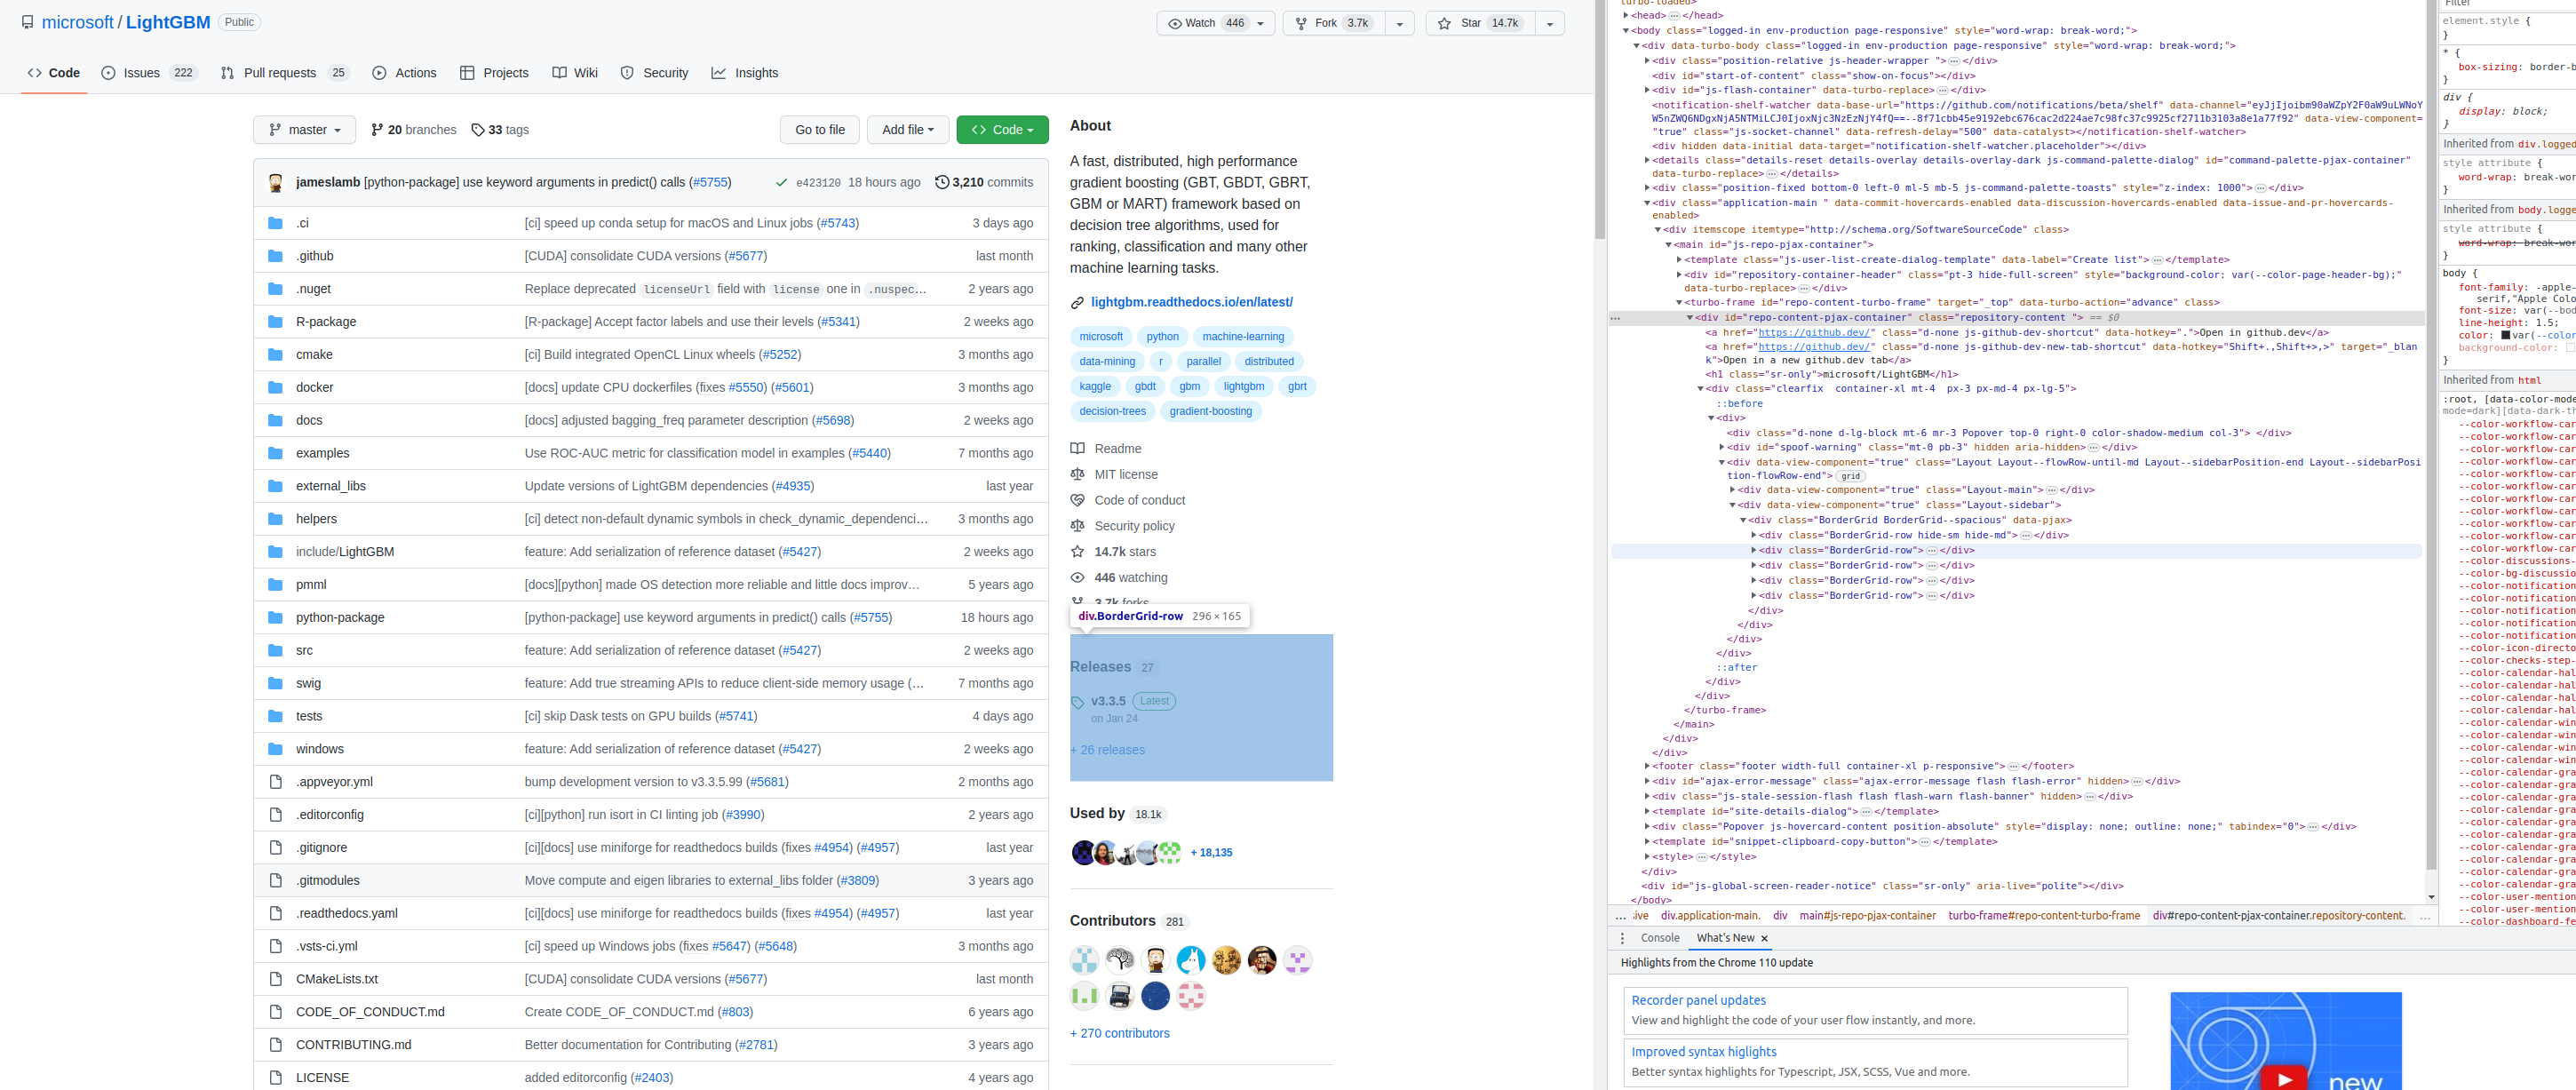

Для примера, давайте попробуем найти HTML код, который ответственен за отображение кнопки `Pull requests`. Для этого мы будем постепенно раскрывать элементы на панели справа, пока не найдём тот, при наведении на который данная кнопка подсветится. Поскольку элементы на странице вложены друг в друга, поиск сильно облегчается (на картинке мы нашли элемент, который **включает в себя** элемент с кнопкой `Pull requests`, значит искать дальше можно только внутри него)

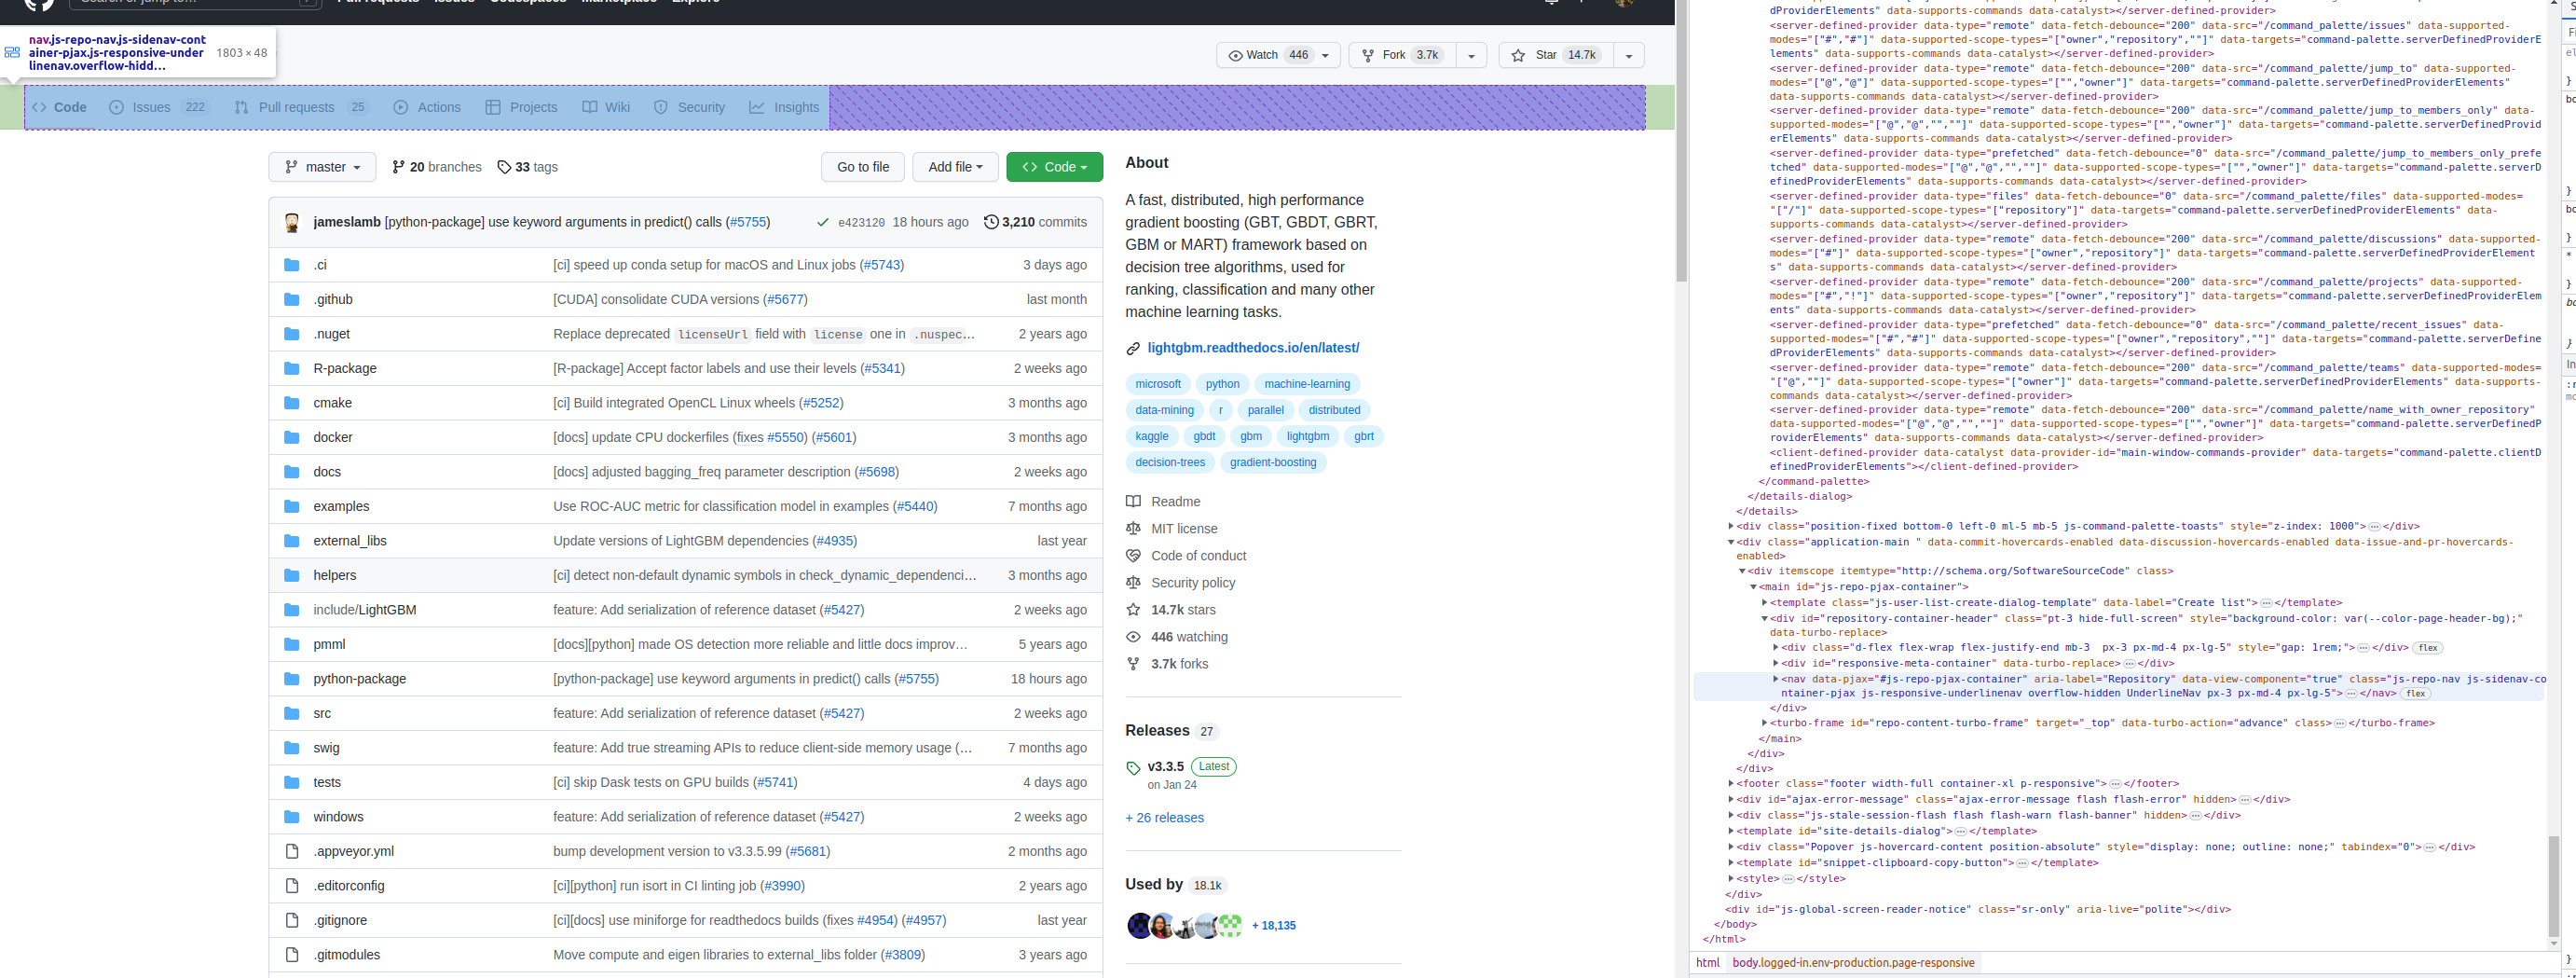

В конце концов мы находим нужный элемент и видим, что он состоит из ряда более маленьких:
1. `li` (list item) - элемент списка
2. `a` - ссылка
3. `svg` - векторная картинка
4. `span` - inline контейнер, мы видим, что в нём как раз и находится текст *Pull requests*

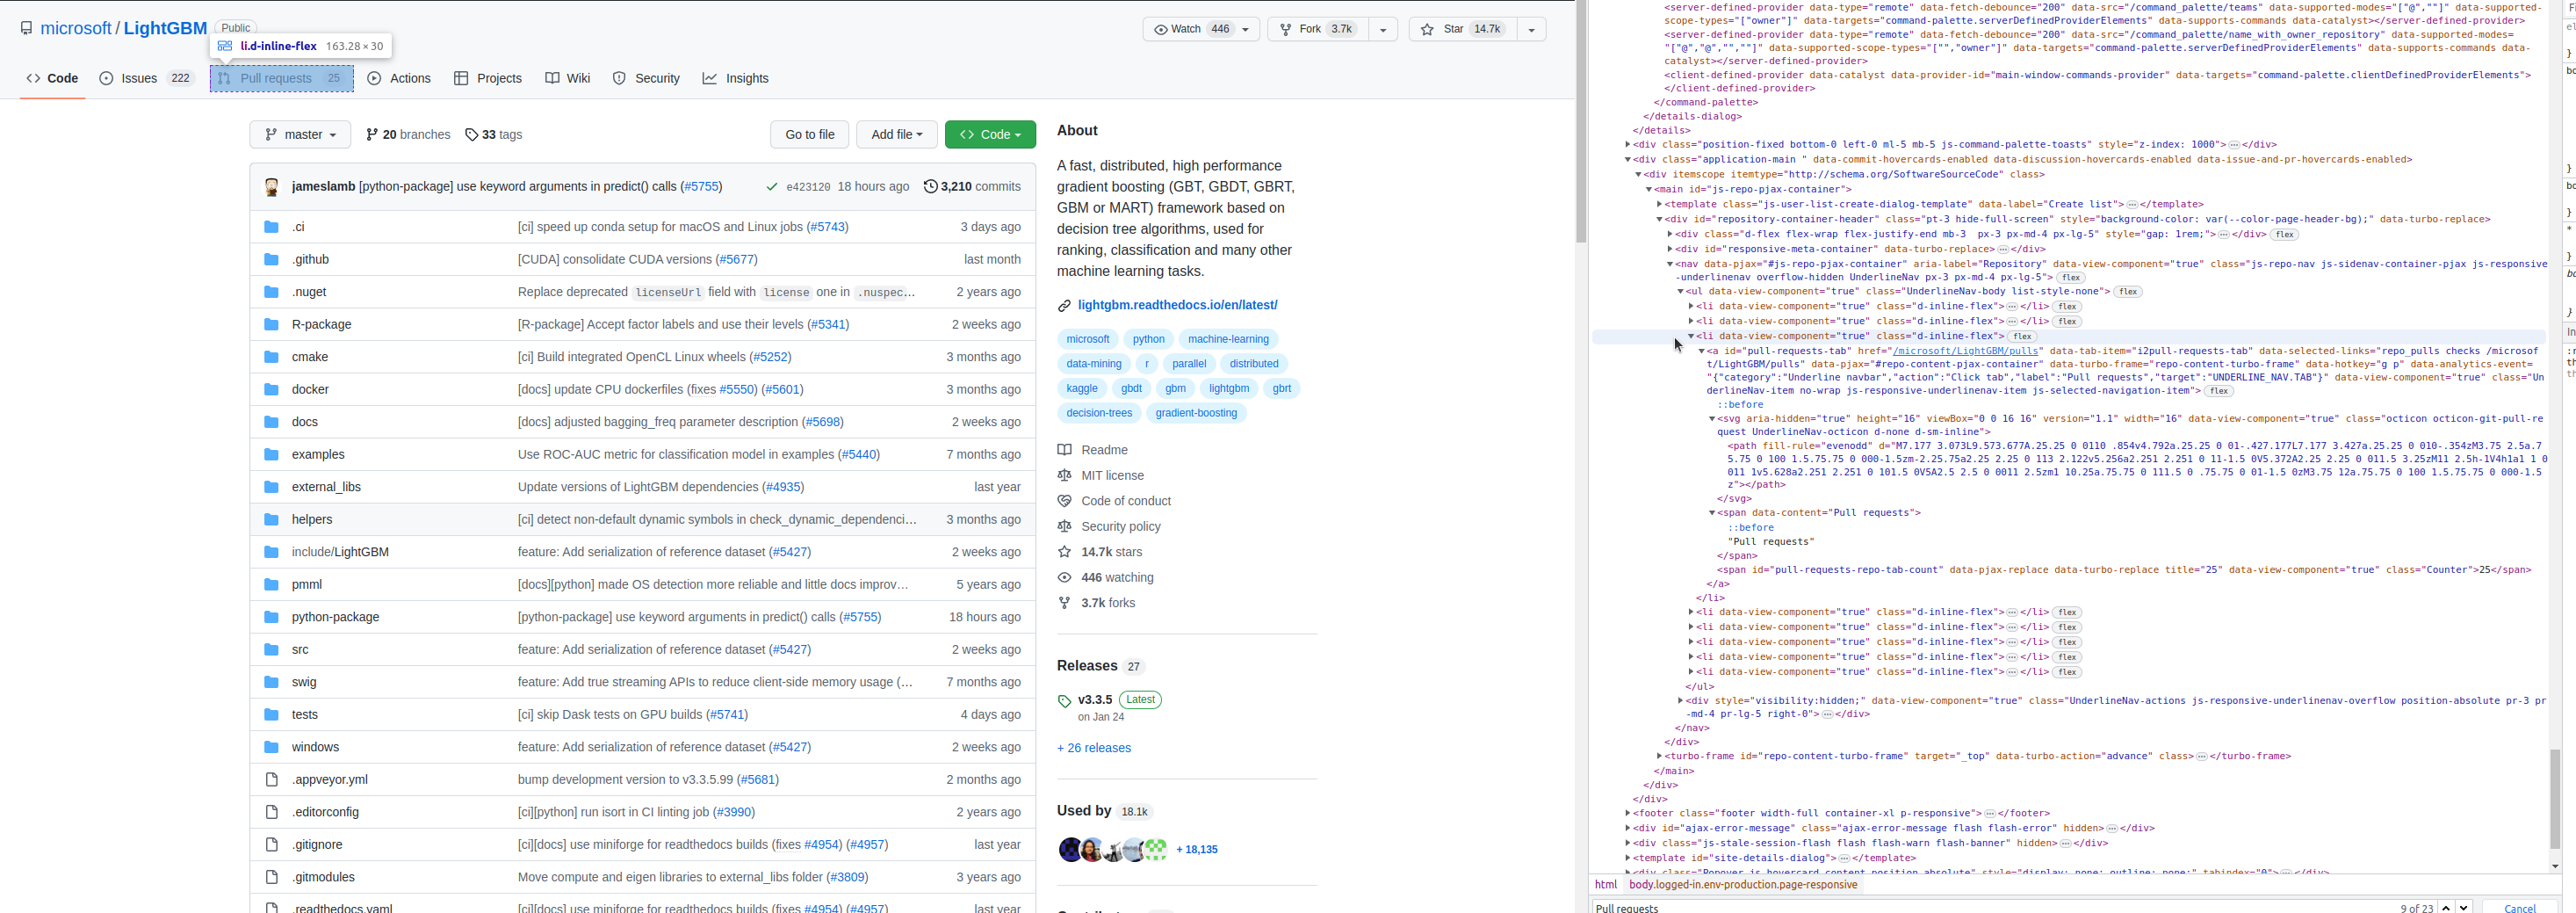

Процесс поиска можно ускорить, открывая меню разработчика после клика ПКМ сразу по нужному элементу, но это работает не всегда

HTML код хранит в себе всё содержимое страницы и даже больше. Позже мы научимся получать этот код из питона и **парсить** его с целью получения полезной информации